# ヒストグラム均一化
- 機能：画像の分布をヒストグラム表示＆分布を均一化
- 活用事例：均一化により精度向上の場合がある
- 課題：自分の画像でヒストグラム均一化してみましょう

### 画像処理

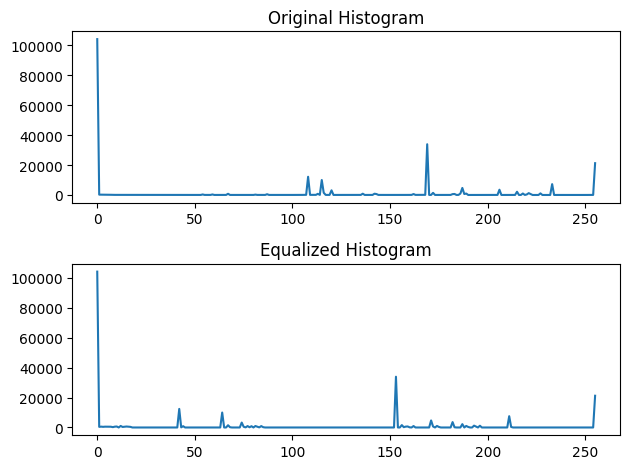

In [1]:
import cv2
import matplotlib.pyplot as plt


# 画像読み込み
img = cv2.imread('./images/nabe550.png')
img = cv2.resize(img, (480, 480))

# グレースケール変換
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ヒストグラム均一化
img_equ = cv2.equalizeHist(img_gray)

# ヒストグラムの取得
img_hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
equ_hist = cv2.calcHist([img_equ], [0], None, [256], [0, 256])

# ヒストグラムの表示
plt.subplot(2, 1, 1)
plt.plot(img_hist)
plt.title('Original Histogram')

plt.subplot(2, 1, 2)
plt.plot(equ_hist)
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()

# 画像表示
cv2.imshow('original_image', img_gray)
cv2.imshow('equalized_image', img_equ)

# 終了処理
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.waitKey(1) #Macで終了時に固まってしまう対処

### カメラ／動画処理

In [2]:
import cv2


cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

while True:
    
    # カメラからフレームを取得
    ret, frame = cap.read()
    frame = cv2.resize(frame, (640, 480))

    # グレースケール変換
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ヒストグラム均一化
    frame = cv2.equalizeHist(frame)

    # 画像表示
    cv2.imshow('movie', frame)

    # ESCキーを押したらループを終了
    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

# Macの方は下記コードのコメント解除してください
# cv2.waitKey(1)